<a href="https://colab.research.google.com/github/Suresh104103/fake-news-detection-project/blob/main/_fake_real_news_predection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:

import kagglehub
clmentbisaillon_fake_and_real_news_dataset_path = kagglehub.dataset_download('clmentbisaillon/fake-and-real-news-dataset')

print('Data source import complete.')

Data source import complete.


# Import Libraries

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder,MinMaxScaler,StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import MultinomialNB
from sklearn.svm import SVC
import re
import string


# Functions

In [ ]:
def clean_word(text):
    text = text.lower()
    text = re.sub ('\[.*?\]','',text)

    text = re.sub ('\\W',' ',text)

    text = re.sub ('https?://\S+|www\.\S+','',text)

    text = re.sub ('\<.*?>+','',text)

    text = re.sub ('[%s]'% re.escape(string.punctuation),'',text)

    text = re.sub ('\n','',text)

    text = re.sub ('\w*\d\w*','',text)
    return text

In [ ]:
def train_test_model(model,x_train,x_test,y_train,y_test):
    # Train model
    model.fit(x_train,y_train)

    # Test model
    y_predict = model.predict(x_test)

    # Show confusion_matrix classification_report accuracy_score
    print(f'\n accuracy_score = {accuracy_score(y_test,y_predict)} \n')
    print(f'confusion_matrix = \n {confusion_matrix(y_test,y_predict)}\n')
    print(f'classification_report = \n {classification_report(y_test,y_predict)}')

    # Heatmap of the confusion matrix
    plt.figure(figsize=(10, 6))
    cm = confusion_matrix(y_test, y_predict)

    # Fake --> class 0 , Real --> class 1
    sns.heatmap(cm, annot=True, fmt="d" ,cmap = 'Blues', xticklabels=["Fake", "Real"], yticklabels=["Fake", "Real"])

    # Labels and title
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.title('Confusion Matrix')
    plt.show()


#  Exploratory Data Analysis (EDA) – Fake News Detection

## Read Data

In [ ]:
fake_path = '/kaggle/input/fake-and-real-news-dataset/Fake.csv'
real_path = '/kaggle/input/fake-and-real-news-dataset/True.csv'

fake_data = pd.read_csv(fake_path)
real_data = pd.read_csv(real_path)


## Add label column

In [ ]:
fake_data['label'] = 0
real_data['label'] = 1

In [ ]:
fake_data.shape

(23481, 5)

In [ ]:
fake_data.sample(5)

,title,text,subject,date,label
16814,BREAKING: NORTH KOREA Detains American Student...,Apparently it takes just one American student ...,Government News,"Jan 22, 2016",0
1900,Trump’s Longtime Friend Larry King Just STUNG...,Larry King has been in the radio and journalis...,News,"April 4, 2017",0
18972,SPECTACULAR! Kid Rock Blows Up “Made In China”...,Michigan born and raised rock phenom Kid Rock ...,left-news,"Mar 15, 2017",0
398,Trump Praises Coast Guard’s Hurricane Relief ...,Leave it to Donald Trump to disrespect both th...,News,"September 10, 2017",0
7482,Gov. Chris Christie Bails On Cop’s Funeral To...,Governor Chris Christie wasted no time after s...,News,"March 15, 2016",0


In [ ]:
real_data.shape

(21417, 5)

In [ ]:
real_data.sample(5)

,title,text,subject,date,label
13257,Cholera could resurge in Yemen due to lack of ...,GENEVA (Reuters) - Another wave of cholera cou...,worldnews,"December 3, 2017",1
12703,Sri Lanka parliament backs tax exemptions for ...,COLOMBO (Reuters) - Sri Lanka s parliament app...,worldnews,"December 8, 2017",1
10026,Vanguard CEO 'encouraged' by efforts to revise...,(Reuters) - Vanguard Group Chief Executive Bil...,politicsNews,"April 7, 2016",1
18337,City of Oxford strips Aung San Suu Kyi of huma...,LONDON (Reuters) - Myanmar leader Aung San Suu...,worldnews,"October 4, 2017",1
13401,Argentina blocks some activists from attending...,BUENOS AIRES (Reuters) - Argentina revoked the...,worldnews,"November 30, 2017",1


## Merge Data

In [ ]:
data = pd.concat([fake_data, real_data], ignore_index=True)

In [ ]:
data.sample(10)

,title,text,subject,date,label
16051,WHY DEMOCRATS KEEP LOSING: Rep. Hakeem Jeffrie...,Hakeem Jeffries just exposed his Trump Derange...,Government News,"Jun 13, 2017",0
28267,Supreme Court rules uniform design elements ca...,(Reuters) - The U.S. Supreme Court on Wednesda...,politicsNews,"March 22, 2017",1
35243,Venezuela may ban main opposition parties from...,CARACAS (Reuters) - Venezuela s pro-government...,worldnews,"December 21, 2017",1
35045,No man an island - China warns against strayin...,BEIJING (Reuters) - Members of China s ruling ...,worldnews,"December 22, 2017",1
28311,Tillerson signaled U.S. policy of patience on ...,WASHINGTON (Reuters) - U.S. Secretary of State...,politicsNews,"March 20, 2017",1
18749,TOWN’S PARADE CANCELED After Violent Antifa Ra...,The irony in this entire cancellation of a tra...,left-news,"Apr 26, 2017",0
3921,Obama’s EPIC Smackdown Of GOP Senator For Usi...,Senator Pat Toomey is a staunch Republican cau...,News,"November 5, 2016",0
31012,Betting sites see record wagering on U.S. pres...,"NEW YORK (Reuters) - The raucous, passionate a...",politicsNews,"November 7, 2016",1
12286,MARCO RUBIO Weighs In On Castro’s Death: “He d...,,politics,"Nov 27, 2016",0
11853,VIDEO: CROWD Chants “LOCK HER UP!” As Crooked ...,Boos and chants of Lock her up! were heard i...,politics,"Jan 20, 2017",0


In [ ]:
data.shape

(44898, 5)

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 44898 entries, 0 to 44897
Data columns (total 5 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   title    44898 non-null  object
 1   text     44898 non-null  object
 2   subject  44898 non-null  object
 3   date     44898 non-null  object
 4   label    44898 non-null  int64 
dtypes: int64(1), object(4)
memory usage: 1.7+ MB


## Check Null Value

In [ ]:
data.isnull().sum()


,0
title,0
text,0
subject,0
date,0
label,0


## Check Duplicated values

In [ ]:
data.duplicated().sum()

np.int64(209)

In [ ]:
data.drop_duplicates(inplace=True)

## Convert Date coloumn from object to datetime format

In [ ]:
data['date'] = pd.to_datetime(data['date'], errors='coerce',format='mixed')

In [ ]:
data.date

,date
0,2017-12-31
1,2017-12-31
2,2017-12-30
3,2017-12-29
4,2017-12-25
...,...
44893,2017-08-22
44894,2017-08-22
44895,2017-08-22
44896,2017-08-22


In [ ]:
data.isnull().sum()

,0
title,0
text,0
subject,0
date,10
label,0


In [ ]:
data.dropna(subset=['date'], inplace=True)

In [ ]:
data.isnull().sum()

,0
title,0
text,0
subject,0
date,0
label,0


In [ ]:
data.nunique()

,0
title,38723
text,38640
subject,8
date,1010
label,2


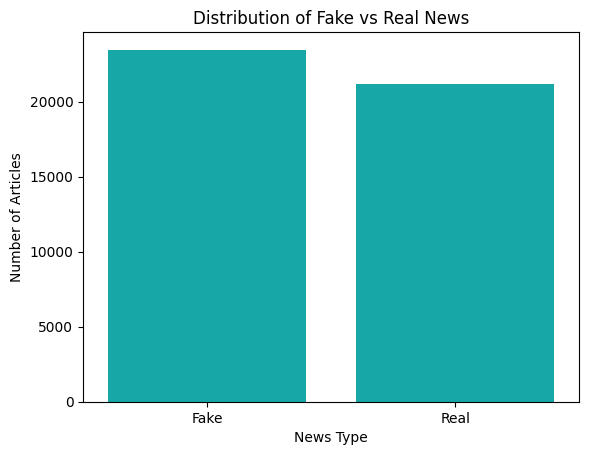

In [ ]:
sns.countplot(x='label', data=data, color='c')
plt.title("Distribution of Fake vs Real News")
plt.xlabel("News Type")
plt.ylabel("Number of Articles")
plt.xticks([0, 1], ['Fake', 'Real'])
plt.show()

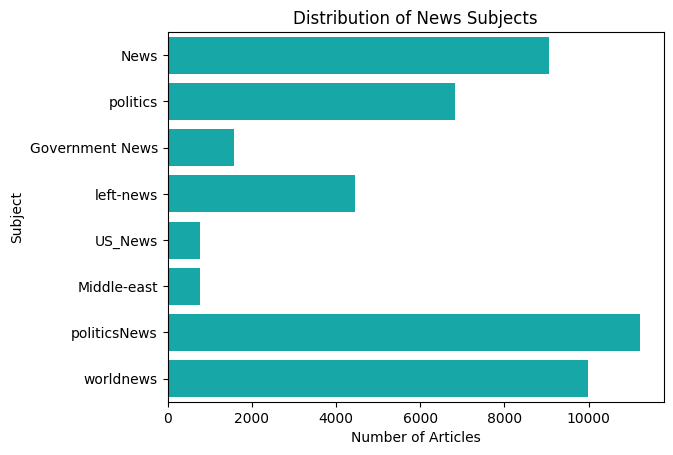

In [ ]:
sns.countplot(y='subject', data=data, color='c')
plt.title("Distribution of News Subjects")
plt.xlabel("Number of Articles")
plt.ylabel("Subject")

plt.show()

Text(0, 0.5, 'Number of Articles')

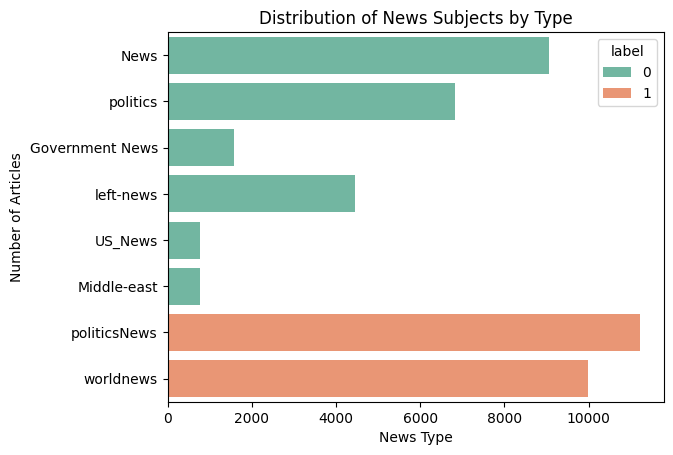

In [ ]:
sns.countplot(y='subject', hue='label', data=data, palette='Set2')
plt.title("Distribution of News Subjects by Type")
plt.xlabel("News Type")
plt.ylabel("Number of Articles")

In [ ]:
data['text_length'] = data['text'].str.len()

In [ ]:
data['text_length'].head().reset_index()

,index,text_length
0,0,2893
1,1,1898
2,2,3597
3,3,2774
4,4,2346


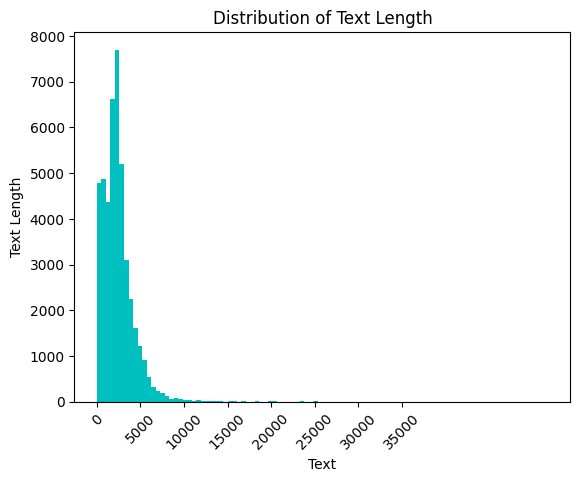

In [ ]:
plt.hist(data['text_length'],bins= 100, color='c')
plt.title("Distribution of Text Length")
plt.xlabel("Text")
plt.ylabel("Text Length")
plt.xticks(np.arange(0, 40000, 5000),rotation=45)
plt.show()

In [ ]:
data.columns

Index(['title', 'text', 'subject', 'date', 'label', 'text_length'], dtype='object')

In [ ]:
data['text'] = data['text'].apply(clean_word)

In [ ]:
data['text'].reset_index()

,index,text
0,0,donald trump just couldn t wish all americans ...
1,1,house intelligence committee chairman devin nu...
2,2,on friday it was revealed that former milwauk...
3,3,on christmas day donald trump announced that ...
4,4,pope francis used his annual christmas day mes...
...,...,...
44674,44893,brussels reuters nato allies on tuesday we...
44675,44894,london reuters lexisnexis a provider of l...
44676,44895,minsk reuters in the shadow of disused sov...
44677,44896,moscow reuters vatican secretary of state ...


# Split data

In [ ]:
x = data['text']
y =data['label']

In [ ]:
x_train,x_test,y_train,y_test = train_test_split(x,y, random_state = 45,test_size = 0.3)

# Converts a collection of text documents into a matrix of TF-IDF features

In [ ]:
# class in scikit-learn that converts a collection of text documents into a matrix of TF-IDF features
vectorization = TfidfVectorizer()

# earn the vocabulary and TF-IDF values from the training set and transform the text into TF-IDF vectors for the training data
xv_train = vectorization.fit_transform(x_train)

# use the previously learned vocabulary and IDF values from the training set to transform the test data into TF-IDF vectors
xv_test = vectorization.transform(x_test)

# Train and Test Data in ML Models



 accuracy_score = 0.9870188003581021 

confusion_matrix = 
 [[6948   93]
 [  81 6282]]

classification_report = 
               precision    recall  f1-score   support

           0       0.99      0.99      0.99      7041
           1       0.99      0.99      0.99      6363

    accuracy                           0.99     13404
   macro avg       0.99      0.99      0.99     13404
weighted avg       0.99      0.99      0.99     13404



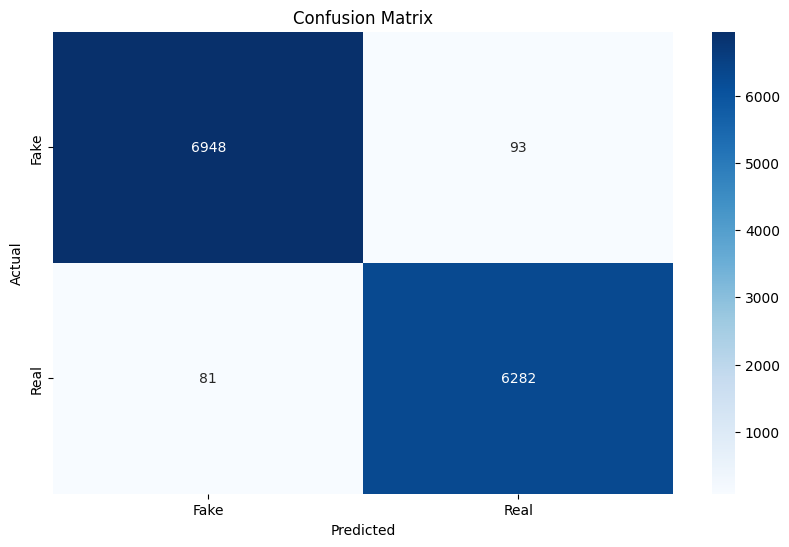

In [ ]:
train_test_model(LogisticRegression(),xv_train,xv_test,y_train,y_test)




 accuracy_score = 0.9950760966875559 

confusion_matrix = 
 [[7002   39]
 [  27 6336]]

classification_report = 
               precision    recall  f1-score   support

           0       1.00      0.99      1.00      7041
           1       0.99      1.00      0.99      6363

    accuracy                           1.00     13404
   macro avg       1.00      1.00      1.00     13404
weighted avg       1.00      1.00      1.00     13404



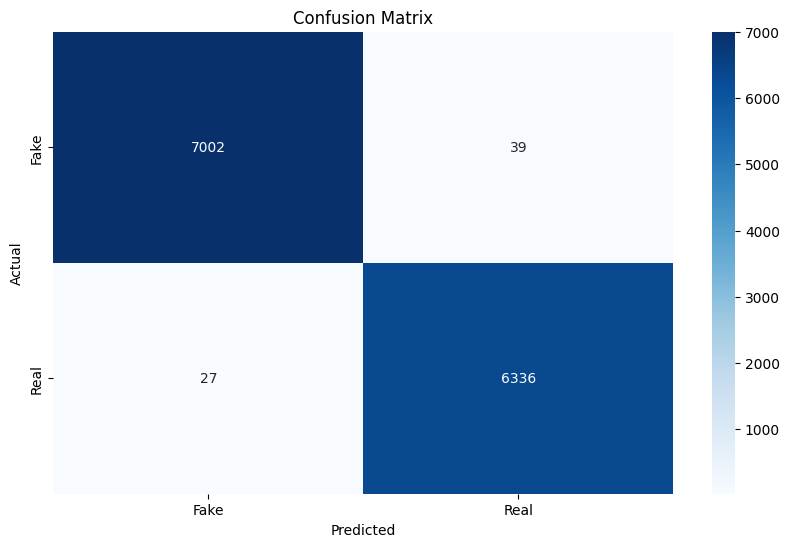

In [ ]:
train_test_model (DecisionTreeClassifier(),xv_train,xv_test,y_train,y_test)